<a href="https://colab.research.google.com/github/VNKT777/Cifar10_Image_Cassifier/blob/main/CIFAR10_Image_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras.datasets import cifar10
from keras.layers import MaxPooling2D , Dense, Conv2D, Flatten, Dropout, Activation
from keras.optimizers import Adam
from keras.utils import np_utils
from keras.models import Sequential

In [2]:
num_classes = 10 
batchsize = 32
epoch = 15

(x_train,y_train),(x_test,y_test) = cifar10.load_data()

img_rows = x_train[0].shape[0]
img_cols = x_train[1].shape[0]

x_train =x_train.astype('Float32')
x_test =x_test.astype('Float32')

x_train /= 255
x_test /= 255

y_train = keras.utils.to_categorical(y_train,num_classes)
y_test = keras.utils.to_categorical(y_test,num_classes)

170500096/170498071 [==============================] - 2s 0us/step


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  # This is added back by InteractiveShellApp.init_path()


In [3]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same',activation='relu',input_shape=x_train.shape[1:]))
model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same',activation='relu'))
model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation = 'softmax'))

opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# Let's create our model
model.compile(loss = 'categorical_crossentropy',
              optimizer = opt,
              metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0

In [ ]:
history = model.fit(x_train, y_train, batch_size=32, epochs=epoch,validation_data=(x_test,y_test),shuffle='True')

Epoch 1/15
1563/1563 [==============================] - 16s 10ms/step - loss: 0.6735 - accuracy: 0.7727 - val_loss: 0.6829 - val_accuracy: 0.7673
Epoch 2/15
1563/1563 [==============================] - 16s 10ms/step - loss: 0.6663 - accuracy: 0.7722 - val_loss: 0.6612 - val_accuracy: 0.7732
Epoch 3/15
1563/1563 [==============================] - 16s 10ms/step - loss: 0.6674 - accuracy: 0.7730 - val_loss: 0.6853 - val_accuracy: 0.7669
Epoch 4/15
1563/1563 [==============================] - 16s 10ms/step - loss: 0.6683 - accuracy: 0.7732 - val_loss: 0.6510 - val_accuracy: 0.7785
Epoch 5/15
1563/1563 [==============================] - 16s 10ms/step - loss: 0.6593 - accuracy: 0.7756 - val_loss: 0.7294 - val_accuracy: 0.7557
Epoch 6/15
1563/1563 [==============================] - 16s 10ms/step - loss: 0.6567 - accuracy: 0.7777 - val_loss: 0.6569 - val_accuracy: 0.7768
Epoch 7/15
 307/1563 [====>.........................] - ETA: 12s - loss: 0.6587 - accuracy: 0.7764

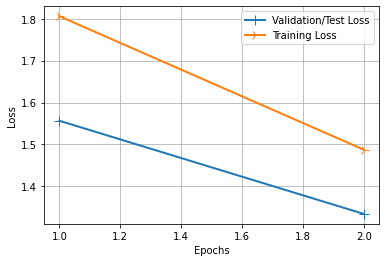

In [39]:
# Plotting our loss charts
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

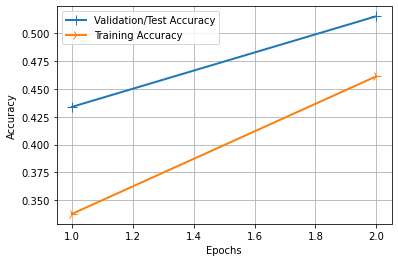

In [43]:
import matplotlib.pyplot as plt

history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()